The provided Python code performs various operations related to linear algebra, focusing on methods like Cramer's rule, Gaussian elimination with pivoting (Gauss Pivot), and LU decomposition with pivoting (LU Pivot). It starts by importing necessary libraries and a custom module named aeromod that presumably contains implementations of the mentioned linear algebra methods. 

The matrix_compare function compares the solutions obtained by Cramer's rule, Gauss Pivot, and LU Pivot for a given system of linear equations. It calculates the execution time and residual accuracy for each meth T

The code then defines several matrices (a1 to a4) and corresponding vectors (b1 to b4) of varying sizes. It applies the matrix_compare function to each pair of matrices and vectors, storing the results in lists. The performance comparison table summarizes the accuracy of each method for different matrix sizes (3x3, 7x7, 9x9, 11 1).

Finally, the code includes a plot showing the computational time for each method with different matrix sizes. Additionally, it demonstrates the calculation of the identity matrix and the inverse matrix for a specific 4x4 matrix.

### Part 1 and 2:

In [1]:
#import libraries and primary module with cramer's rule, swap, error, gaussPivot, and LUPivot
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import aeromod as mod

In [2]:
#This function is the main calculation of the code. This calculates the cramer, LUpivot, and gausspivot of an a, b matrix pair.
#This function also calculates the time each takes to run as well as the accuracy or residual of the calcuation.
def matrix_compare(a,b):
    #cramer's rule
    timerStart = time.perf_counter() #Begin Timer
    cramer = mod.cramer(a.copy(), b.copy())
    timerEnd = time.perf_counter() #End timer
    cramerTime = timerEnd - timerStart #Calculates the difference on each system
    
    #LUPivot
    timerStart = time.perf_counter() #Begin Timer
    LUDecomp = mod.LUdecomp(a.copy())
    LUa, seq = LUDecomp
    LUsolve = mod.LUsolve(LUa.copy(), b.copy(), seq.copy())
    timerEnd = time.perf_counter() #End timer
    LUTime= timerEnd - timerStart #Calculates the difference on each system
    
    #gauss pivot
    timerStart = time.perf_counter() #Begin Timer
    gauss = mod.gaussPivot(a.copy(), b.copy())
    timerEnd = time.perf_counter() #End timer
    gaussTime= timerEnd - timerStart #Calculates the difference on each system

    #residuals: calculates the accuracy of each method by taking the dot product of the original solution and the solution to obtain a b-matrix. 
    #It then takes the product of the calculated b matrix and finds the difference with the real b matrix. Ideally it would be approaching or is zero. 
    #cramer residual
    x1 = np.zeros((len(b),1))
    x1 = np.dot(np.copy(a), cramer)
    cramer_acc = np.linalg.norm(x1 - np.copy(b))
    #LU residual
    x2 = np.zeros((len(b),1))
    x2 = np.dot(np.copy(a), LUsolve)
    LU_acc = np.linalg.norm(x2 - np.copy(b))
    #gauss residual
    x3 = np.zeros((len(b),1))
    x3 = np.dot(np.copy(a), gauss)
    gauss_acc = np.linalg.norm(x3 - np.copy(b))

    #returns all the values calculated in the function
    return cramer, gauss, LUsolve, cramerTime, gaussTime, LUTime, cramer_acc, gauss_acc, LU_acc

In [3]:
#function that calculates the inverse matrix
def inverse_matrix(a):
    n = len(a[0])
    aInv = np.identity(n)
    a, seq = mod.LUdecomp(a.copy())
    for i in range(n):
        aInv[:, i] = mod.LUsolve(a.copy(), aInv[:, i], seq)
    return aInv

### Part 3:

In [4]:
#Given a b matrix in the textbook and specified in the assignment
a = np.array([[10, -2, -1, 2, 3, 1, -4, 7],
            [5, 11, 3, 10, -3, 3, 3, -4],
            [7, 12, 1, 5, 3, -12, 2, 3],
            [8, 7, -2, 1, 3, 2, 2, 4],
            [2, -15, -1, 1, 4, -1, 8, 3],
            [4, 2, 9, 1, 12, -1, 4, 1],
            [-1, 4, -7, -1, 1, 1, -1, -3],
            [-1, 3, 4, 1, 3, -4, 7, 6]], dtype="float64")
b = np.array([[0], [24], [-10], [6], [-50], [-52], [18], [-14]], dtype="float64")

In [5]:
#calls prior function to calculated the a b matrix definied above
cramer, gauss, LUsolve, cramerTime, gaussTime, LUTime, cramer_acc, gauss_acc, LU_acc = matrix_compare(a,b)

#stores returned values into a panda dataframe to be used in a table later. 
solutions = {"Method": ["Cramer", "LU Pivot", "Gauss"],
            "Solution": [cramer.round(2), LUsolve.round(2), gauss.round(2)]}
df_solutions = pd.DataFrame(solutions)
#removes the header and number column in the panda datafrome for easier reading
print(df_solutions.to_string(index=False)+"\n")

#second table and dataframe for comparing the residuals and time of each method. 
preformance_metrics_table = {"Method": ["Cramer", "LU Pivot", "Gauss"], "Residual": [cramer_acc, LU_acc,gauss_acc], "Time":[cramerTime, LUTime, gaussTime]}
df_preformance_metrics_table = pd.DataFrame(preformance_metrics_table)
print(df_preformance_metrics_table.to_string(index=False))

  Method                                                     Solution
  Cramer [[-2.0], [2.0], [-2.0], [2.0], [-2.0], [2.0], [-2.0], [2.0]]
LU Pivot [[-2.0], [2.0], [-2.0], [2.0], [-2.0], [2.0], [-2.0], [2.0]]
   Gauss [[-2.0], [2.0], [-2.0], [2.0], [-2.0], [2.0], [-2.0], [2.0]]

  Method     Residual     Time
  Cramer 1.530144e-13 0.000485
LU Pivot 2.467794e-14 0.000591
   Gauss 2.139017e-14 0.001238


### Part 4:

In [6]:
#[a] Maxtricies - self generated and confirmed to be non-singular
a1 = np.array([[5, 6, 2],
               [0, 7, 8],
               [6, 8, 6]], dtype="float64")
a2 = np.array([[4, 5, -5, 7, 2, 1, 6],
               [6, -8, 1, 4, 7, 2, -3],
               [7, 4, -7, 4, 1, 6, -9],
               [7, 2, 4, 7, 3, 1, -7],
               [6, -7, 5, -5, 4, 1, -2],
               [8, 9, 2, 4, 6, -5, 7],
               [8, -4, 2, -1, 3, -6, 6]], dtype="float64")
a3 = np.array([[4, 5, -5, 7, 2, 1, 6, 8, 4],
               [6, -8, 1, 4, 7, 2, -3, -3, 5],
               [7, 4, -7, 4, 1, 6, -9, -5, 9],
               [7, 2, 4, 7, 3, 1, -7, 1, 9],
               [6, -7, 5, -5, 4, 1, -2, 2, -4],
               [8, 9, 2, 4, 6, -5, 7, 3, 8],
               [8, -4, 2, -1, 3, -6, 6, 6, 0],
               [3, 4, -6, 3, -9, 5, 4, 1, -1],
               [9, 5, -4, 2, -1, 3, 4, -4, 7]], dtype="float64")
a4 = np.array([[4, 5, -5, 7, 2, 1, 6, 8, 4, 8, 3],
               [6, -8, 1, 4, 7, 2, -3, -3, 5, 5, 8],
               [7, 4, -7, 4, 1, 6, -9, -5, 9, 4, -5],
               [7, 2, 4, 7, 3, 1, -7, 1, 9, 7, 4],
               [6, -7, 5, -5, 4, 1, -2, 2, -4, -8, 6],
               [8, 9, 2, 4, 6, -5, 7, 3, 8, 9, 6],
               [8, -4, 2, -1, 3, -6, 6, 6, 0, -3, 7],
               [3, 4, -6, 3, -9, 5, 4, 1, -1, 5, 9],
               [9, 5, -4, 2, -1, 3, 4, -4, 7, 4, 2],
               [3, 4, -7, 5, -8, 3, 5, -3, 9, -3, 2],
               [5, 3, -6, 7, 3, 2, -4, -2, 9, 9, 7]], dtype="float64")

#[b] Matricies - self generated and confirmed to be non-singular
b1 = np.array([[2], [3], [4]], dtype="float64")
b2 = np.array([[2], [3], [4], [5], [6], [7], [8]], dtype="float64")
b3 = np.array([[2], [3], [4], [5], [6], [7], [8], [9], [10]], dtype="float64")
b4 = np.array([[2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]], dtype="float64")

In [7]:
#stores generated matricies in to a list that can be used in the for loop
matrix_sets = [(a1, b1), (a2, b2), (a3, b3), (a4, b4)]
#initlaizes all lists that the data will be stored in and later ouputted in dataframes
cramerList = []
gaussList = []
LUsolveList = []
cramerTimeList = []
gaussTimeList = []
LUTimeList = []
cramer_accList = []
gauss_accList = []
LU_accList = []

#a for loop that runs through all the a and b matricies and calculate the solutions, residuals, and times.
for a, b in matrix_sets:
    cramer, gauss, LUsolve, cramerTime, gaussTime, LUTime, cramer_acc, gauss_acc, LU_acc = matrix_compare(a, b)

    #appends the returned data into respective lists for printing to the dataframe
    cramerList.append(cramer)
    gaussList.append(gauss)
    LUsolveList.append(LUsolve)
    cramerTimeList.append(cramerTime)
    gaussTimeList.append(gaussTime)
    LUTimeList.append(LUTime)
    cramer_accList.append(cramer_acc)
    gauss_accList.append(gauss_acc)
    LU_accList.append(LU_acc)

#dataframe that stores and formats lists results on the accuracy of each one.
preformance_comparison = {"Matrix Size": ["3", "7", "9", "11"],
        "Gauss Accuracy": [gauss_accList[0], gauss_accList[1], gauss_accList[2], gauss_accList[3]],
        "LU Accuracy": [LU_accList[0], LU_accList[1], LU_accList[2], LU_accList[3]],
        "Cramer Accuracy": [cramer_accList[0], cramer_accList[1], cramer_accList[2], cramer_accList[3]]}
preformance_comparison_table = pd.DataFrame(preformance_comparison)
print(preformance_comparison_table.to_string(index=False))

Matrix Size  Gauss Accuracy  LU Accuracy  Cramer Accuracy
          3    0.000000e+00 8.881784e-16     1.489520e-15
          7    1.776357e-15 2.878027e-15     3.118126e-14
          9    5.402578e-15 3.794300e-15     5.908890e-14
         11    6.275344e-14 6.961869e-14     5.646915e-13


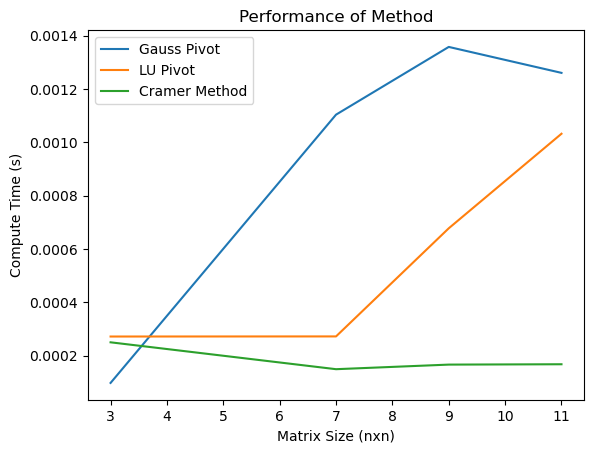

In [8]:
#Defines matrix sizes and formats into the same geometry of the appened lists so it can be plotted using matplotlib. 
matrix_size = [3, 7, 9, 11]
plt.plot(matrix_size, gaussTimeList, label="Gauss Pivot")
plt.plot(matrix_size, LUTimeList, label="LU Pivot")
plt.plot(matrix_size, cramerTimeList, label="Cramer Method")

#gives titles and defines chart for user understanding
plt.title("Performance of Method")
plt.xlabel("Matrix Size (nxn)")
plt.ylabel("Compute Time (s)")
plt.legend(loc="upper left")
#prints the plot below
plt.show()

### Part 5:

In [9]:
#problem defined in the textbook that needs inverted
a = np.array([[3, -7, 45, 21],
              [12, 11, 10, 17],
              [6, 25, -80, -24],
              [17, 55, -9, 7]], dtype="float64")

#calls above function for inverting and confirms it worked by finding the identity matrix
identity_matrix = np.dot(inverse_matrix(a), a)
print("Identity Matrix (should be close to an identity matrix):")
print(abs(identity_matrix.round(2)))

#formats and prints the data out in an easy to read format
a_inv = inverse_matrix(a)
print("\nOriginal Matrix:")
print(a)
print("\nInverse Matrix:")
print(a_inv)

Identity Matrix (should be close to an identity matrix):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Original Matrix:
[[  3.  -7.  45.  21.]
 [ 12.  11.  10.  17.]
 [  6.  25. -80. -24.]
 [ 17.  55.  -9.   7.]]

Inverse Matrix:
[[-2.73050828  1.48528059 -1.34659614 -0.0324862 ]
 [ 0.4824057  -0.27874885  0.23321067  0.02932383]
 [-0.65403634  0.32428703 -0.34061638  0.00672723]
 [ 2.         -1.          1.          0.        ]]
